In [10]:
# data manipulation
import numpy as np
import pandas as pd

# graphic representation
import matplotlib.pyplot as plt
import seaborn as sns

# file system management
import os

In [11]:
data = pd.read_csv('../Data/tweets.csv', encoding='latin-1', header=None)
data = data.rename(columns={data.columns[0]: 'target'})
data = data.rename(columns={data.columns[1]: 'id'})
data = data.rename(columns={data.columns[2]: 'date'})
data = data.rename(columns={data.columns[3]: 'flag'})
data = data.rename(columns={data.columns[4]: 'user'})
data = data.rename(columns={data.columns[5]: 'text'})
data

,target,id,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
...,...,...,...,...,...,...
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


In [12]:
import re
data['text'] = data['text'].apply(lambda x: re.sub(r'\S*@\S*\s?', '', x))
data['text'] = data['text'].apply(lambda x: re.sub(r'http\S+', '', x))
data['text'] = data['text'].apply(lambda x: re.sub(r'[^\w\s]', '', x))
data['text'] = data['text'].apply(lambda x: re.sub(r'\b\w\b', '', x))
data['text'] = data['text'].apply(lambda x: re.sub(r'\d', '', x))
data['text'] = data['text'].apply(lambda x: re.sub(r'\s+', ' ', x))
data['text'] = data['text'].apply(lambda x: x.lower())

In [22]:
df_neg = data[data['target']== 0].sample(1000)
df_pos = data[data['target']== 4].sample(1000)
df_pos['target'] = 1
liste_concat = [df_neg, df_pos]
df_sample = pd.concat([df_neg, df_pos], ignore_index=True)
df_sample = df_sample.sample(frac=1).reset_index(drop=True)
df_sample

,target,id,date,flag,user,text
0,0,1677846615,Sat May 02 04:18:11 PDT 2009,NO_QUERY,Genevieve_26,port is winning the showdown
1,0,1678833685,Sat May 02 07:50:45 PDT 2009,NO_QUERY,keysa7,yea hate my life wanna cry worse morning ever
2,1,1980479293,Sun May 31 06:51:49 PDT 2009,NO_QUERY,aMmadz,hmm ok then will trying selling later now njoy...
3,1,1694035407,Mon May 04 00:47:44 PDT 2009,NO_QUERY,ChineseLearn,hi have uploaded completely new chinese lesson...
4,1,1986005405,Sun May 31 18:10:19 PDT 2009,NO_QUERY,allidillon,have defeated the laundry pile
...,...,...,...,...,...,...
1995,1,1881139999,Fri May 22 03:44:04 PDT 2009,NO_QUERY,xtashacanningx,good luck with ur exam tell the others also
1996,0,2050996474,Fri Jun 05 19:40:22 PDT 2009,NO_QUERY,nirvank,yes tasty total beverage in westminister they ...
1997,0,1994781516,Mon Jun 01 12:26:59 PDT 2009,NO_QUERY,SirMikeyB,want lego harry potter now
1998,1,1998962969,Mon Jun 01 19:24:53 PDT 2009,NO_QUERY,WildAngelJoy,here in ca we call it nice quotflipsidequot so...


In [14]:
from transformers import BertTokenizer, BertForSequenceClassification

tokenizer_path = "../models/tokenizer_bert"
model_path = "../models/model_bert"

tokenizer = BertTokenizer.from_pretrained(tokenizer_path)
model = BertForSequenceClassification.from_pretrained(model_path)

In [8]:
from transformers import pipeline

classifier = pipeline("text-classification", model=model, tokenizer=tokenizer)
text = "Hello, how are you?"
text = "I want you to die"

result = classifier(text)
print(result)

[{'label': 'LABEL_0', 'score': 0.9001312255859375}]


/Applications/anaconda3/envs/BERT-test/lib/python3.10/site-packages/transformers/pipelines/text_classification.py:104: UserWarning: `return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(


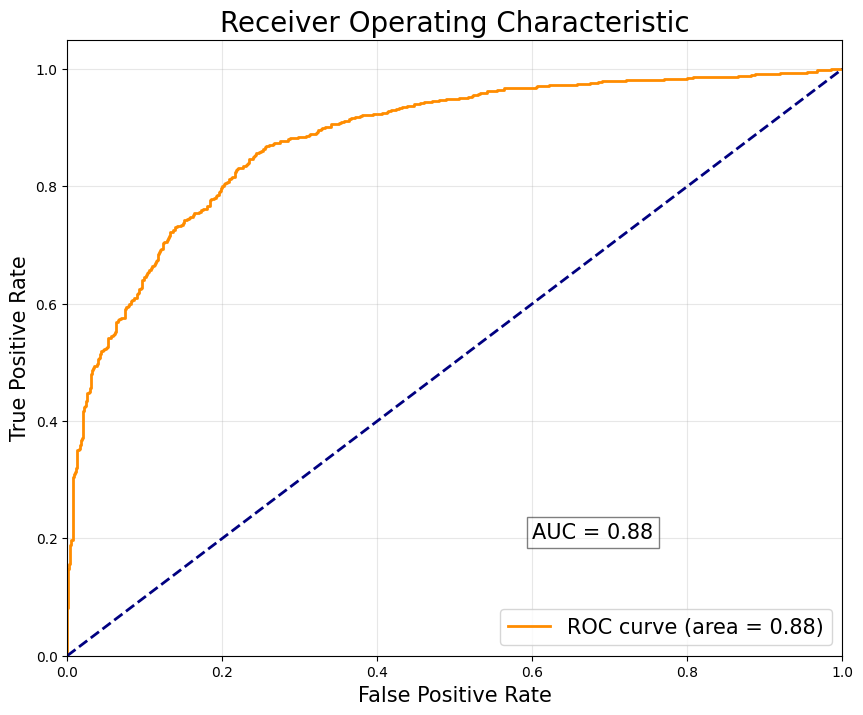

In [23]:
import pandas as pd
import numpy as np
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from transformers import BertTokenizer, BertForSequenceClassification, pipeline

tokenizer_path = "../models/tokenizer_bert"
model_path = "../models/model_bert"

tokenizer = BertTokenizer.from_pretrained(tokenizer_path)
model = BertForSequenceClassification.from_pretrained(model_path)

classifier = pipeline("text-classification", model=model, tokenizer=tokenizer, return_all_scores=True)

def get_prediction_score(text):
    result = classifier(text)
    score_label_1 = next(score['score'] for score in result[0] if score['label'] == 'LABEL_1')
    return score_label_1

df_sample['predicted_score'] = df_sample['text'].apply(get_prediction_score)

y_true = df_sample['target']
y_scores = df_sample['predicted_score']

fpr, tpr, thresholds = roc_curve(y_true, y_scores)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=15)
plt.ylabel('True Positive Rate', fontsize=15)
plt.title('Receiver Operating Characteristic', fontsize=20)
plt.legend(loc="lower right", fontsize=15)
plt.grid(alpha=0.3)
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'cyan', 'magenta'])
plt.text(0.6, 0.2, f'AUC = {roc_auc:.2f}', fontsize=15, bbox=dict(facecolor='white', alpha=0.5))
plt.show()


In [19]:
from transformers import RobertaTokenizer, RobertaForSequenceClassification

tokenizer_path = "../models/tokenizer_roberta"
model_path = "../models/model_roberta"

tokenizer = RobertaTokenizer.from_pretrained(tokenizer_path)
model = RobertaForSequenceClassification.from_pretrained(model_path)

In [20]:
from transformers import pipeline

classifier = pipeline("text-classification", model=model, tokenizer=tokenizer)
text = "Hello, how are you?"

result = classifier(text)
print(result)

[{'label': 'LABEL_1', 'score': 0.8758872747421265}]


/Applications/anaconda3/envs/BERT-test/lib/python3.10/site-packages/transformers/pipelines/text_classification.py:104: UserWarning: `return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(


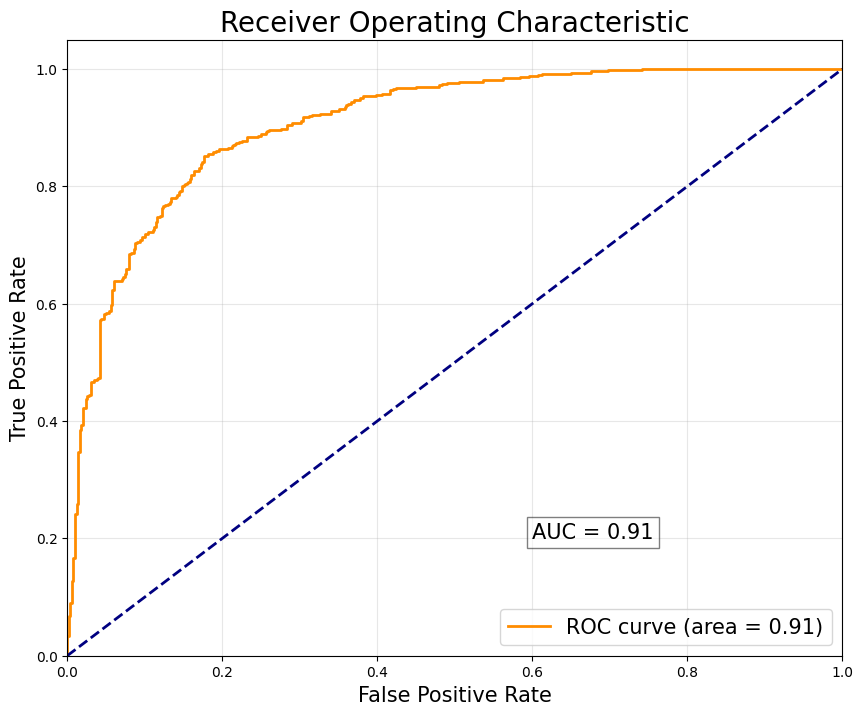

In [21]:
import pandas as pd
import numpy as np
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

classifier = pipeline("text-classification", model=model, tokenizer=tokenizer, return_all_scores=True)

def get_prediction_score(text):
    result = classifier(text)
    score_label_1 = next(score['score'] for score in result[0] if score['label'] == 'LABEL_1')
    return score_label_1

df_sample['predicted_score'] = df_sample['text'].apply(get_prediction_score)

y_true = df_sample['target']
y_scores = df_sample['predicted_score']

fpr, tpr, thresholds = roc_curve(y_true, y_scores)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=15)
plt.ylabel('True Positive Rate', fontsize=15)
plt.title('Receiver Operating Characteristic', fontsize=20)
plt.legend(loc="lower right", fontsize=15)
plt.grid(alpha=0.3)
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'cyan', 'magenta'])
plt.text(0.6, 0.2, f'AUC = {roc_auc:.2f}', fontsize=15, bbox=dict(facecolor='white', alpha=0.5))
plt.show()
